In [1]:
#Importing needed libaries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

c:\app\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


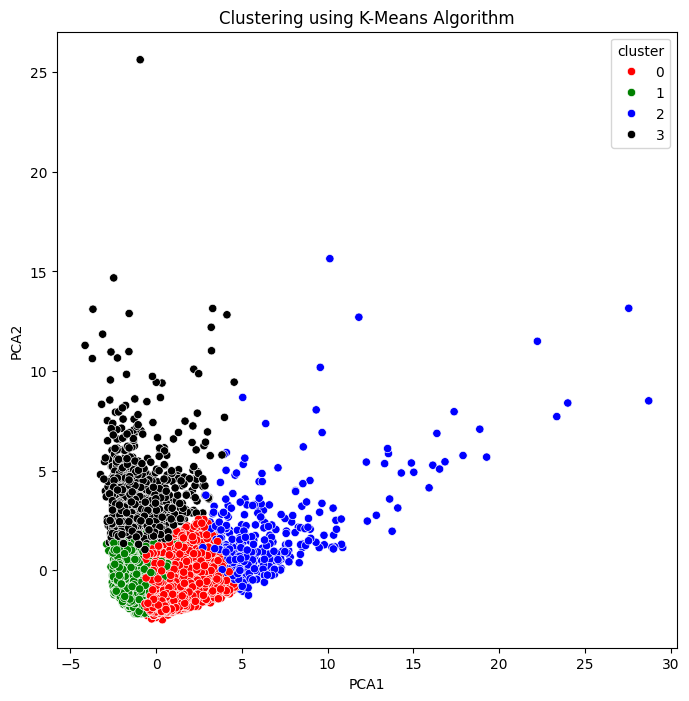

          BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0       40.900749           0.818182      95.40              0.00   
1     3202.467416           0.909091       0.00              0.00   
2     2495.148862           1.000000     773.17            773.17   
3     1666.670542           0.636364    1499.00           1499.00   
4      817.714335           1.000000      16.00             16.00   
...           ...                ...        ...               ...   
8945    28.493517           1.000000     291.12              0.00   
8946    19.183215           1.000000     300.00              0.00   
8947    23.398673           0.833333     144.40              0.00   
8948    13.457564           0.833333       0.00              0.00   
8949   372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                      95.40      0.000000             0.166667   
1                       0.00   6442.9

In [18]:
#Loading in data set and exploring
dataset = pd.read_csv('Customer Data.csv')

#Checking tail
dataset.head()

#Dropping Unused customer ID, #inplace = True means original dataset is modiefied, false is the default value and only creates a copy
dataset.drop('CUST_ID', axis=1, inplace=True)

#Checking for nulls
dataset.isnull().sum()

#Filling in missing data
dataset['MINIMUM_PAYMENTS'] = dataset['MINIMUM_PAYMENTS'].fillna(dataset['MINIMUM_PAYMENTS']).mean()
dataset['CREDIT_LIMIT'] = dataset['CREDIT_LIMIT'].fillna(dataset['CREDIT_LIMIT']).mean()

#Checking again
dataset.isnull().sum()

#duplicate values
dataset.duplicated().sum()

#Scale the data before PCA
from sklearn.preprocessing import StandardScaler
std_scale = StandardScaler()
dataset_scaled = std_scale.fit_transform(dataset)

#Break down the data to reduce dimensionlity for unsupervised learning
from sklearn.decomposition import PCA
#2D data
pca = PCA(n_components=2)
pca_components = pca.fit_transform(dataset_scaled)

#Creating a dataset from the pca components
pca_dataset = pd.DataFrame(data=pca_components, columns=['PCA1', 'PCA2'])
pca_dataset

#building a K means model
from sklearn.cluster import KMeans
K_means = KMeans(n_clusters=4)
clusters = K_means.fit_predict(dataset_scaled)
#Creating a dataframe out of the clusters
clusters_dataframe = pd.DataFrame(data=clusters, columns=['cluster'])
clusters_dataframe

#Combining the dataframes for visualization
pca_Kmeans_df = pd.concat([pca_dataset, clusters_dataframe], axis=1)

#Visualize the clustering
plt.figure(figsize=(8,8))
ax=sns.scatterplot(x="PCA1",y="PCA2",hue="cluster",data=pca_Kmeans_df,palette=['red','green','blue','black'])
plt.title("Clustering using K-Means Algorithm")
plt.show()

#Creating new dataset with clustering
Finished_dataset = pd.concat([dataset, clusters_dataframe], axis=1)
print(Finished_dataset)

#splitting dataset
X = Finished_dataset.drop(['cluster'], axis=1)
y = Finished_dataset['cluster']

#Splitting data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

#Training a random forest classifer with 500 trees
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=250, max_depth= 5)
random_forest.fit(X_train, y_train)

#Accuracy Test and Training Score
print("Random Forest Training Accuracy: {:.2f}".format(random_forest.score(X_train, y_train)))
print("Random Forest Testing Accuracy: {:.2f}".format(random_forest.score(X_test, y_test)))
